This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scikit learn tools
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
# (a)
# data preprocessing
acids = np.array(['TRP', 'ALA', 'TYR', 'PRO', 'HIS', 'THR', 'GLY', 'SER', 'CYS', 'PHE', 'ASP', 'GLU', 'ISO',
         'MET', 'LEU', 'VAL', 'ASN', 'GLN', 'ARG', 'LYS'])
df = pd.read_csv("data.csv")
# Added a representative header name for the columns that didn't have a header assigned.
current = ['current-' + c for c in acids]
# res_time = ['res_time-' + c for c in acids]

df.columns.values[::2] = current
# df.columns.values[1::2] = res_time

In [3]:
df.head()

,current-TRP,TRP,current-ALA,ALA,current-TYR,TYR,current-PRO,PRO,current-HIS,HIS,...,current-VAL,VAL,current-ASN,ASN,current-GLN,GLN,current-ARG,ARG,current-LYS,LYS
0,1.46,2600,270.6,75.8,-1.23,1800,17.7,170.0,117.6,1090,...,7.4623,400.13,90.166,1114.1,65.565,1509.9,82.483,1427.5,71.236,1459.6
1,21.60,2500,288.4,52.1,11.30,1700,21.3,91.0,105.8,1040,...,10.8040,437.57,94.842,1148.6,59.352,1479.9,77.121,1405.5,66.883,1451.1
2,12.60,3200,284.8,72.5,14.60,1800,21.1,74.0,113.0,1070,...,12.7810,472.14,99.965,1103.7,67.071,1471.7,87.291,1418.1,71.413,1452.2
3,6.31,2600,284.5,70.7,6.59,1800,23.8,130.0,117.2,1040,...,17.9320,414.47,96.657,1061.5,62.765,1495.0,88.109,1428.4,73.894,1434.1
4,-3.39,3300,283.5,41.7,4.60,1900,15.7,72.0,111.1,1030,...,14.0700,466.45,95.404,1144.1,60.378,1475.5,77.720,1443.6,72.228,1458.2


In [4]:
# This rearranges the dataframe into 3 columns: label, Current, Residence time.

df2 = pd.melt(df, value_vars = acids, value_name = 'res_time', var_name = 'label')
df2['current'] = pd.melt(df, value_vars = current)['value']
cols = ['label', 'current', 'res_time']
df2 = df2[cols]
data = df2.to_numpy()
X = data[:,1:]
y = data[:,0]

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

print("Shape of x is: ", X.shape)
print("Shape of y is: ", y.shape)
print(f"Range of y is ({y.min()}, {y.max()})")

Shape of x is:  (2000, 2)
Shape of y is:  (2000,)
Range of y is (0, 19)


In [5]:
df2.head()

,label,current,res_time
0,TRP,1.46,2600.0
1,TRP,21.60,2500.0
2,TRP,12.60,3200.0
3,TRP,6.31,2600.0
4,TRP,-3.39,3300.0


In [6]:
# Split the data set into 70% train and 30% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
# (b)
# k-means with 20 clusters
kmeans = KMeans(n_clusters=20).fit(X_train)

In [8]:
kmeans.cluster_centers_

array([[ 2.32689201e+01,  4.62042014e+02],
       [ 7.49209867e+01,  1.43182133e+03],
       [ 3.71189474e+00,  2.95789474e+03],
       [ 2.58707848e+02,  1.89111392e+02],
       [-1.75601125e+01,  9.86037778e+02],
       [ 9.06783708e+00,  1.99312360e+03],
       [ 2.04933433e+01,  1.00874478e+02],
       [ 1.26219650e+02,  8.32972500e+02],
       [-5.82884615e-02,  2.75000000e+03],
       [ 2.12772803e+02,  2.83437273e+01],
       [ 1.06704018e+02,  1.05092500e+03],
       [ 6.12152500e+00,  1.76000000e+03],
       [ 2.64125147e+01,  7.06265147e+02],
       [ 4.45836364e+00,  3.30000000e+03],
       [ 4.76701585e+01,  2.50208659e+02],
       [ 1.01642829e+02,  1.15245526e+03],
       [ 2.84362319e+02,  6.41971014e+01],
       [ 1.76991176e+02,  2.22500000e+02],
       [ 5.11267213e+01,  1.50787541e+03],
       [ 3.78187500e-01,  2.54375000e+03]])

In [9]:
# Generate the meshgrid and plot the data with decision boundary.
x1, x2 = np.meshgrid(np.arange(X_train[:,0].min(), X_train[:,0].max()),
                     np.arange(X_train[:,1].min(), X_train[:,1].max()))
x1_flat = x1.flatten()
x2_flat = x2.flatten()
x1_flat_reshaped = x1_flat.reshape(x1_flat.shape[0],1)
x2_flat_reshaped = x2_flat.reshape(x1_flat.shape[0],1)
X_mesh = np.hstack((x1_flat_reshaped,x2_flat_reshaped))

In [10]:
mesh_labels = kmeans.predict(X_mesh)
mesh_labels = mesh_labels.reshape(x1.shape)

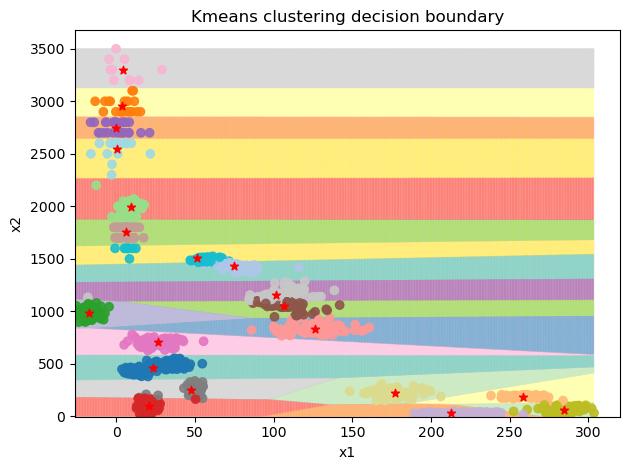

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], c=kmeans.labels_, alpha=0.9, cmap='tab20')
plt.pcolormesh(x1, x2, mesh_labels, cmap="Set3", alpha=0.03, shading="gouraud", zorder=0)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='*')
plt.title("Kmeans clustering decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

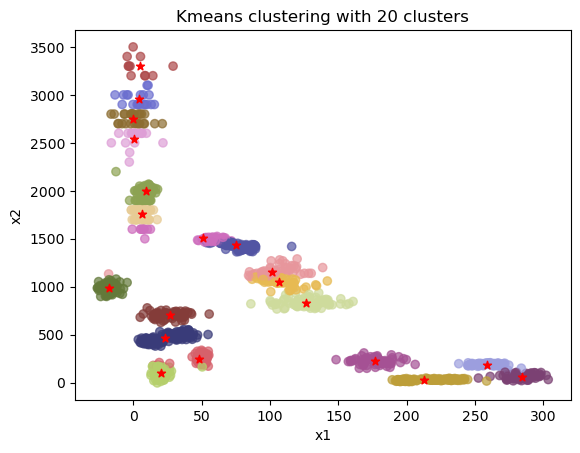

In [12]:
# plot the data colored by the cluster labels obtained through kmeans.
plt.scatter(X_train[:,0], X_train[:,1], c=kmeans.labels_, alpha=0.7, cmap='tab20b')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='*')
plt.title("Kmeans clustering with 20 clusters")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [13]:
# (c)
# random forest with default estimators
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
rf_mesh_labels = rf.predict(X_mesh)
rf_mesh_labels = rf_mesh_labels.reshape(x1.shape)

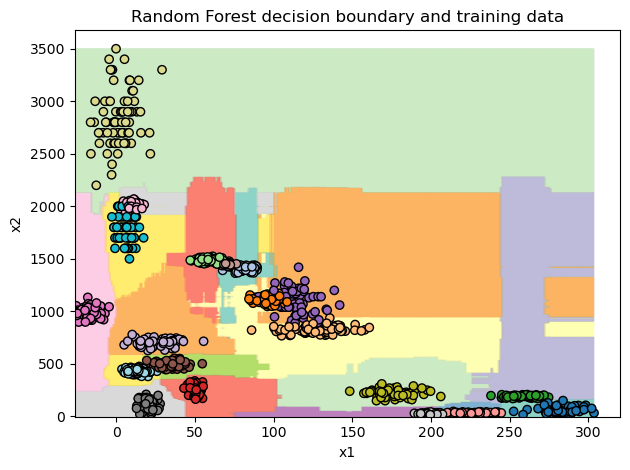

In [15]:
# Plot the random forest decision boundary and training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='tab20', edgecolors='black')
plt.pcolormesh(x1, x2, rf_mesh_labels, cmap="Set3", alpha=0.1, shading="gouraud", zorder=0)
plt.title("Random Forest decision boundary and training data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

Accuracy on test data: 98.16666666666667 %


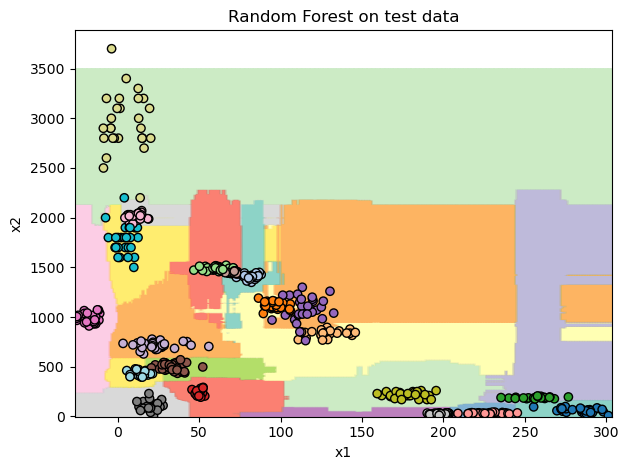

In [16]:
# Plot random forest prediction on the test data and print accuracy.

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='tab20', edgecolors='black')
plt.pcolormesh(x1, x2, rf_mesh_labels, cmap="Set3", alpha=0.1, shading="gouraud", zorder=0)
plt.title("Random Forest on test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
print( f"Accuracy on test data: {accuracy_score(rf.predict(X_test), y_test)*100} %")

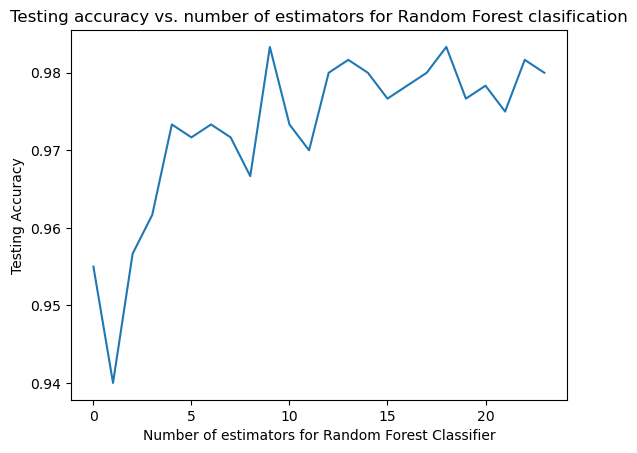

In [17]:
# Get accuracy of random forest for estimators 1 to 25, and plot the accuracy vs estimators.
accuracy =[]
for k in range(1, 25):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(accuracy)
plt.xlabel('Number of estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.title("Testing accuracy vs. number of estimators for Random Forest clasification")
plt.show()

In [18]:
# (d)
# Analysis

Looking at the results of the algorithms, they actually don't seem too different. This is interesting considering k-means is unsupervised.
The most noticeable difference to me is in the decision boundaries, and this is where k-means may be underfitting, because the boundaries seem to go straight in the vertical axis, except in the left side of the plot where there are more clusters close together and the decision boundaries get squeezed. It also seems to extend some of the clusters to points that are very far away and clearly should belong to a different category. This si definitely an effect of being unsupervised, as the algorithm has no way to know what label each data point has.
In comparison, random forest shows decision boundaries that group data with the same true label together much nicer, although there does seem to be some overfitting with some boundaries seeming to have high variance.

Running the code multiple times with varying random initial values, these initial values seem to have a noticeable effect on both the algorithms, especially k-means. Since k-means is unsupervised it does seem to depend slightly on the initial centroid coordinates. The random forest accuracy score varied a little when running a few times, but it was fairly small (1-2 percent difference).

The plot of accuracy vs number of estimators for random forest gives useful information about the optimal number of estimators, since it looks like the accuracy converges at a certain point and adding more estimators seems to have less and less effect on it. Looking at my plot, 12-15 estimators may be a good number to lower the computing load.